<a href="https://colab.research.google.com/github/SailaJuliaa/Proyek_analisisData/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Saila Julia
- **Email:** mc459d5x2115@student.devacademy.id
- **ID Dicoding:** MC459D5X2115

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah peminjaman sepeda perbulan dari tahun 2011-2012
- Bagaimana pola peminjaman sepeda perminggu pada tahun 2011 dan 2012

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling


### Gathering Data

In [2]:
df_day = pd.read_csv("https://raw.githubusercontent.com/SailaJuliaa/Proyek_analisisData/refs/heads/main/Data/day.csv", delimiter=",")
df_day.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [3]:
df_day.shape

(731, 16)

**Insight:**
- Pada ghatering data diidentifikasi berbentuk .csv yaitu pada data day
- Pada day terdapat 731 baris dan 16 kolom data
- Pada data day terdapat beberapa atribut data yaitu: instant, dteday, season, yr, month, hr, holiday, weekday, working day, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt

### Assessing Data

In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df_day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
print("jumlah duplikasi: ", df_day.duplicated().sum())

jumlah duplikasi:  0


In [7]:
print("missing value:", df_day.isna().sum())

missing value: instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
zero_columns = ['temp', 'atemp', 'hum', 'windspeed']
for col in zero_columns:
   zero_count = (df_day[col] == 0).sum()
   print(f'Jumlah nilai 0 pada kolom {col} adalah {zero_count}')

Jumlah nilai 0 pada kolom temp adalah 0
Jumlah nilai 0 pada kolom atemp adalah 0
Jumlah nilai 0 pada kolom hum adalah 1
Jumlah nilai 0 pada kolom windspeed adalah 0


**Insight:**
- Pada data day tidak ada duplikasi dan missing value
- Ada kesalahan pada dtype yang harus diubah yaitu di dteday, season, hr, weathersit
- Cek nilai 0 pada pada beberapa kolom

### Cleaning Data

In [10]:
datetime_col  = ["dteday"]

for columns in datetime_col:
  df_day[columns] = pd.to_datetime(df_day[columns])

In [11]:
print(df_day["dteday"].head())

0   2011-01-01
1   2011-01-02
2   2011-01-03
3   2011-01-04
4   2011-01-05
Name: dteday, dtype: datetime64[ns]


In [12]:
print(df_day["mnth"].head())

0    1
1    1
2    1
3    1
4    1
Name: mnth, dtype: int64


In [13]:
df_day["season"] = df_day["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
df_day["weathersit"] = df_day["weathersit"].map({1: "Clear", 2: "Mist", 3: "Light Rain/Snow", 4: "Heavy Rain/Snow"})
df_day["weekday"] = df_day["weekday"].map({0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"})
df_day["yr"] = df_day["yr"].map({0: 2011, 1: 2012})

In [14]:
if "instant" in df_day.columns:
    df_day.drop("instant", axis=1, inplace=True)

In [15]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    object        
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    object        
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    object        
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(7), object(3)
memory usage: 85.8+ 

In [16]:
df_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,1,0,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,1,0,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,1,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,1,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,1,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Mengubah dtype pada data day yakni : dteday menjadi datetime,season,
 weathersit, weekday menjadi object sesuai dengan type data yang seharusnya dan yr dengan integer
- Menghapus kolom instant pada day karena kurang relevan dan menghambat pengolahan data


## Exploratory Data Analysis (EDA)

### Exploration on the  "df_day"

### Correlation Matrix

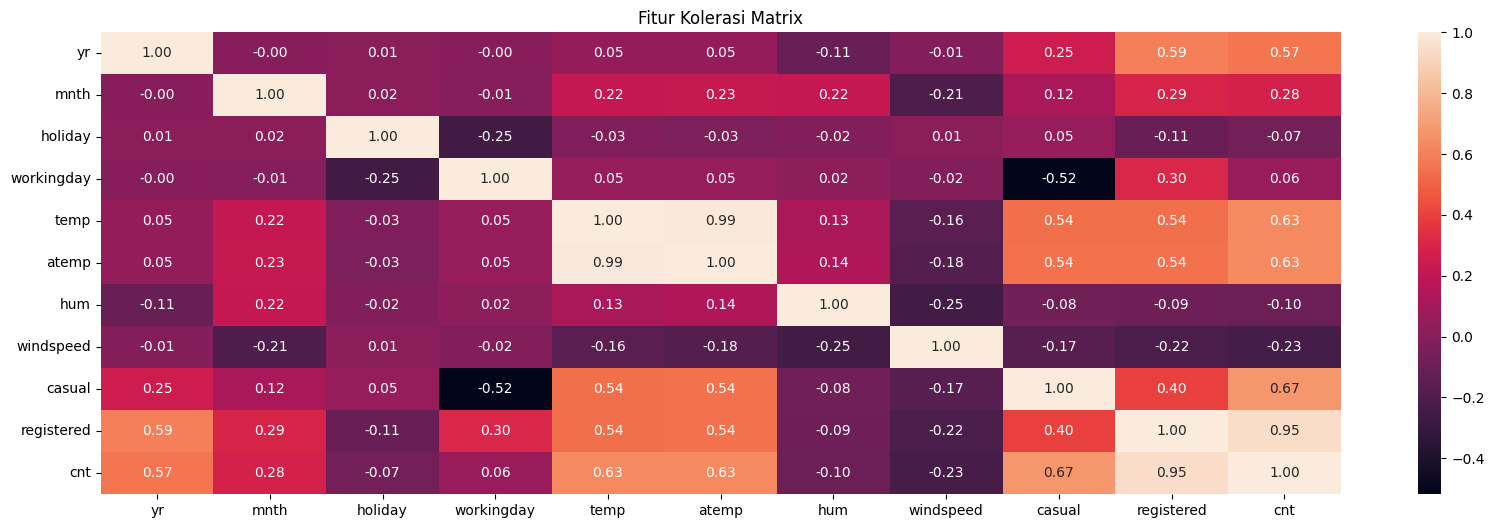

In [17]:
plt.figure(figsize=(20, 6))
sns.heatmap(df_day.select_dtypes(include=np.number).corr(), annot=True, cmap="rocket", fmt=".2f")
plt.title("Fitur Kolerasi Matrix")
plt.show()

### Data Ditribution

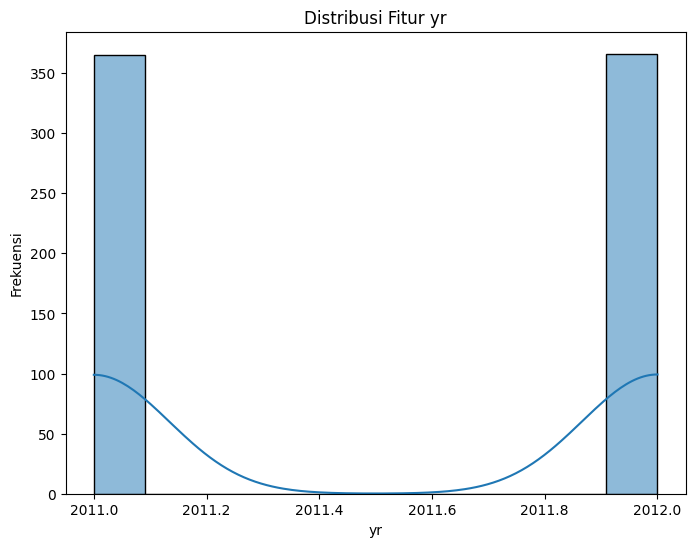

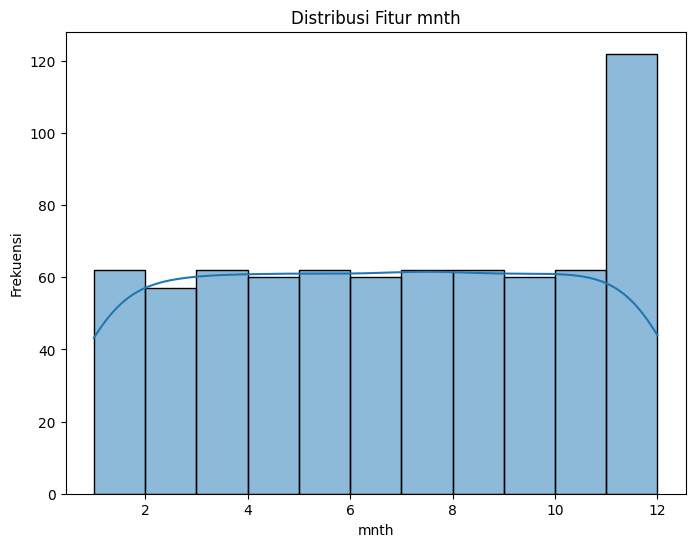

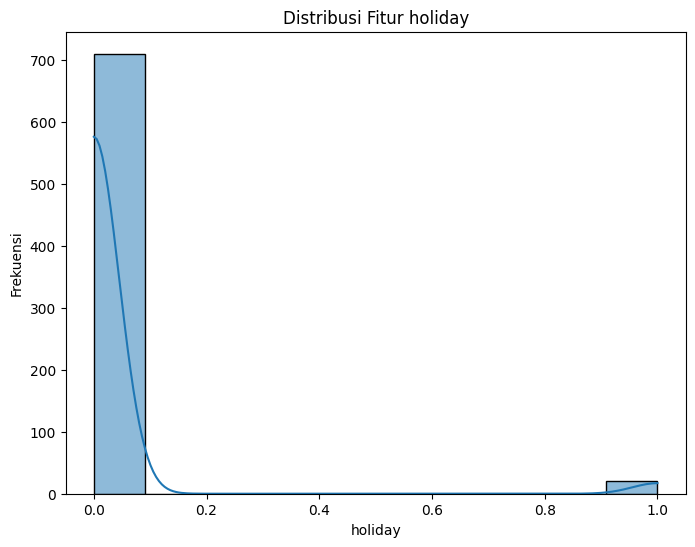

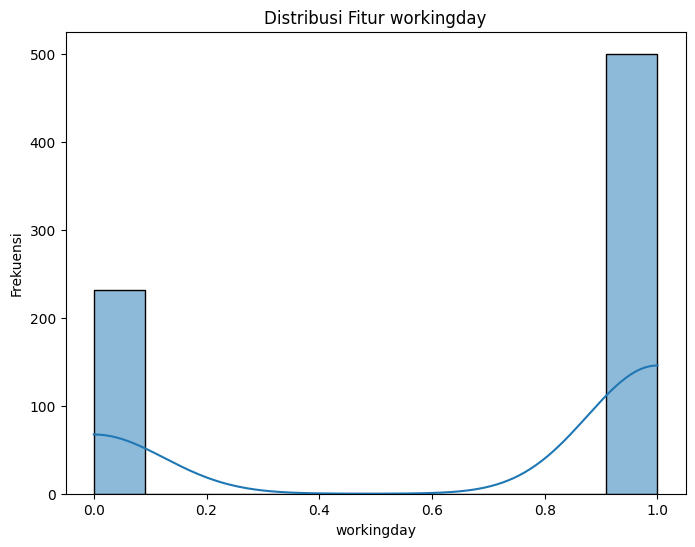

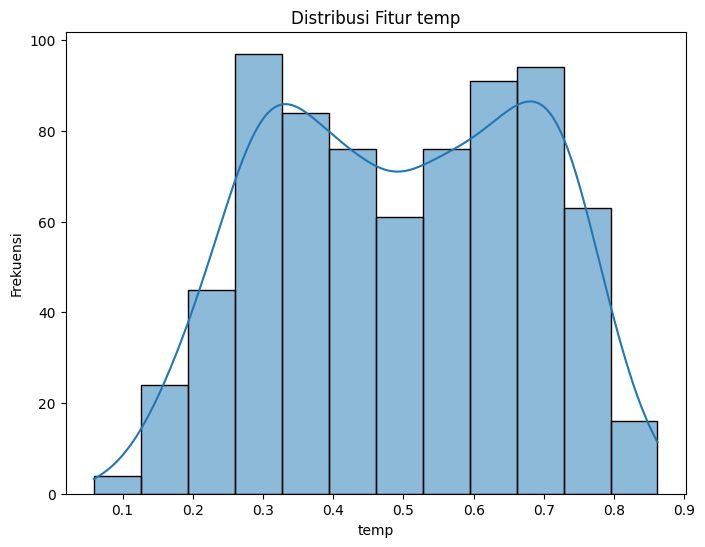

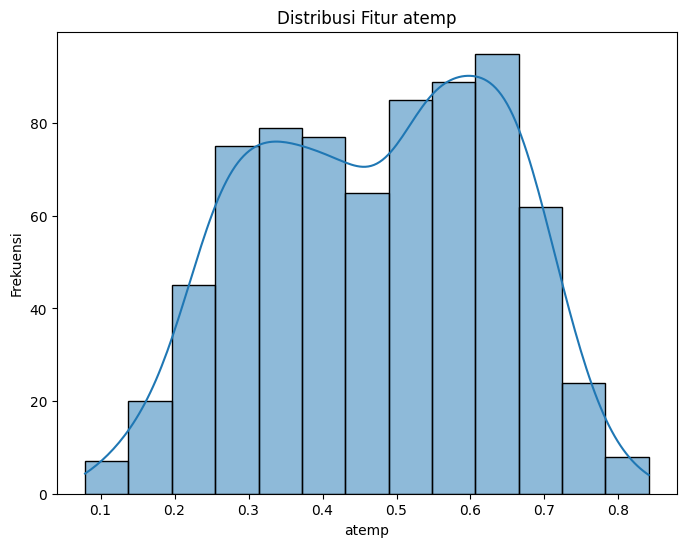

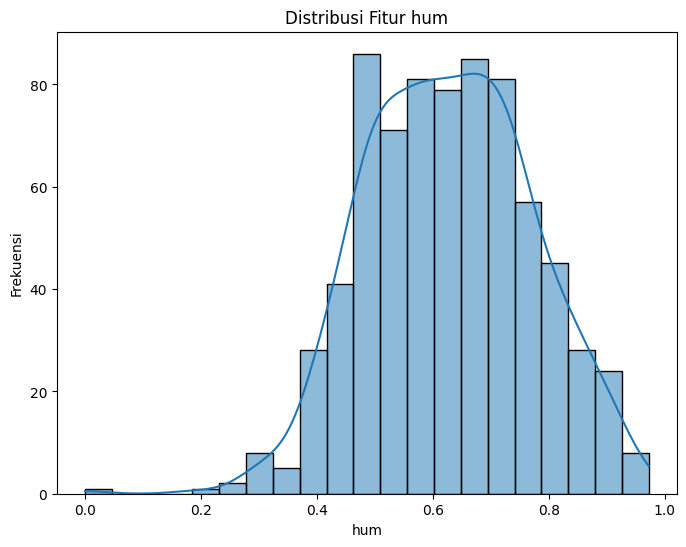

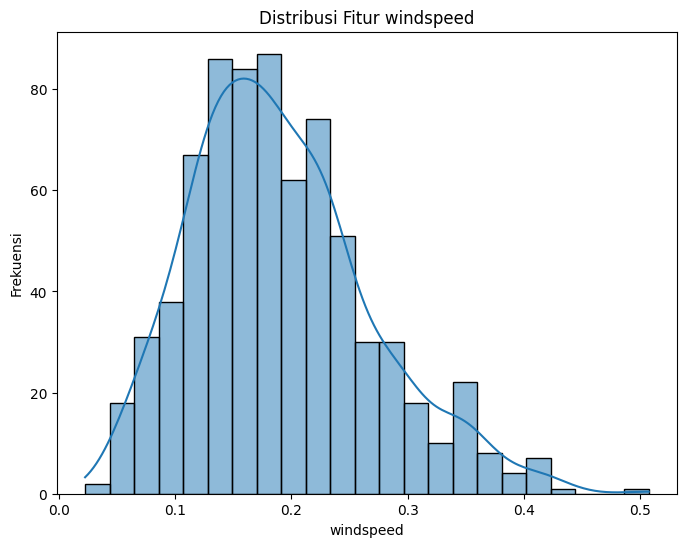

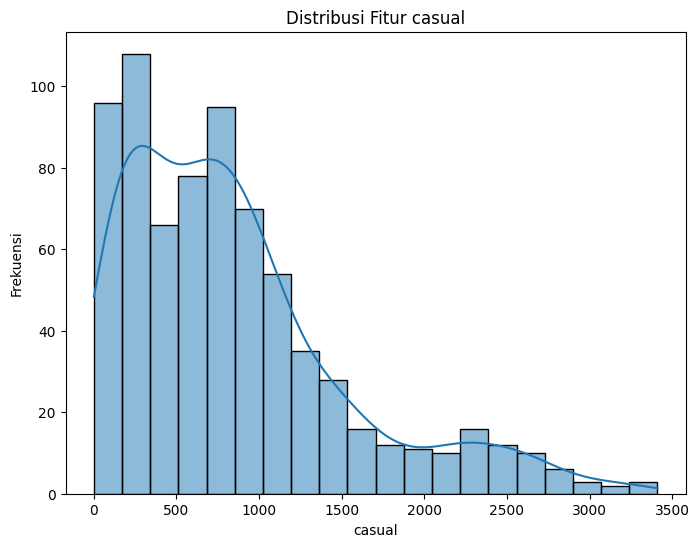

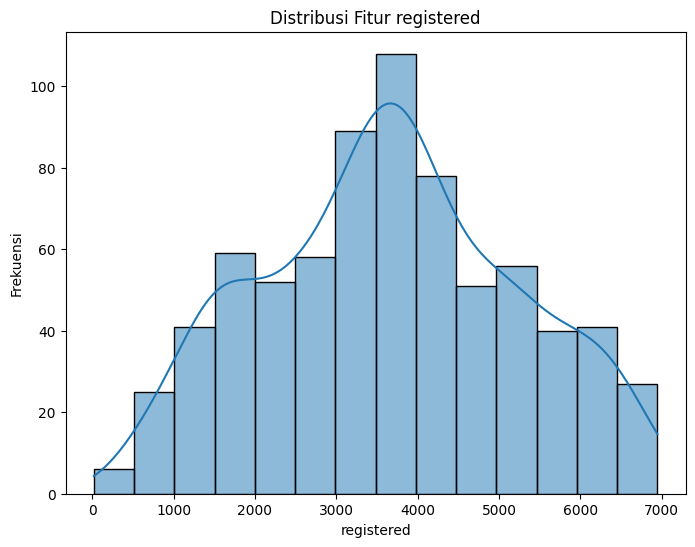

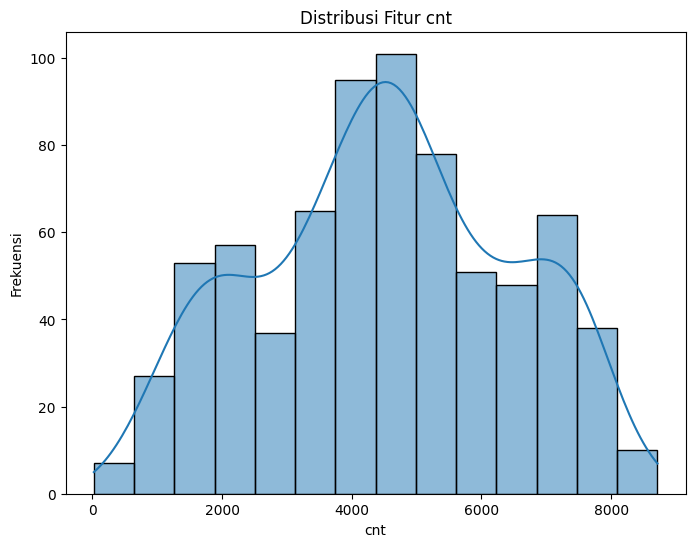

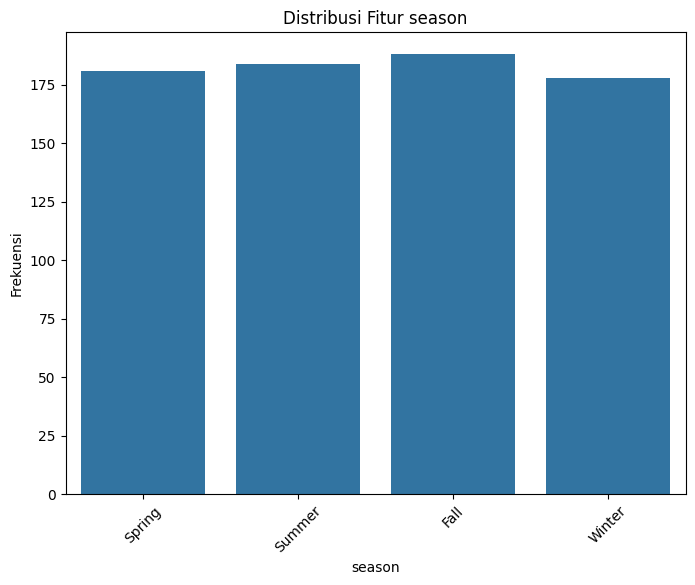

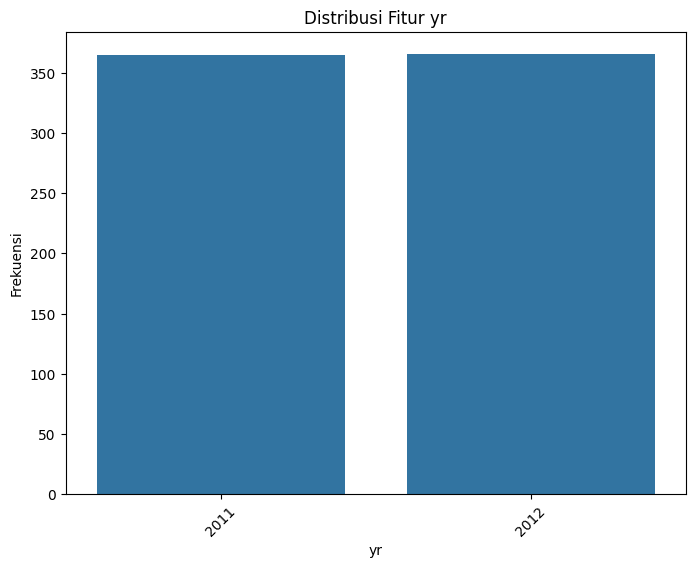

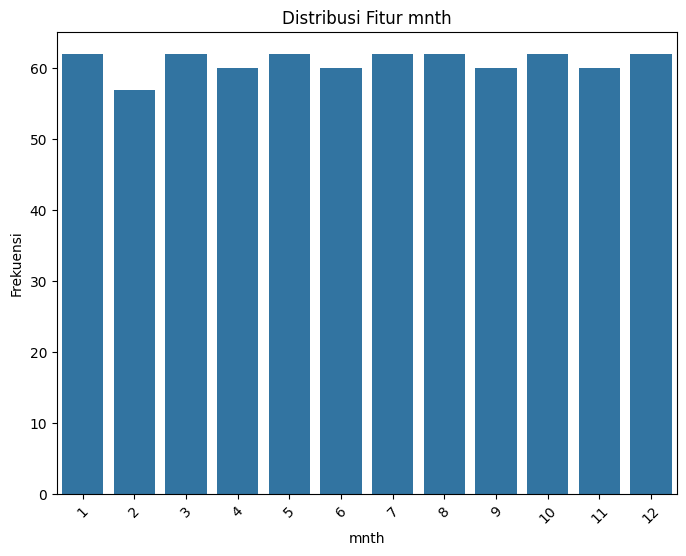

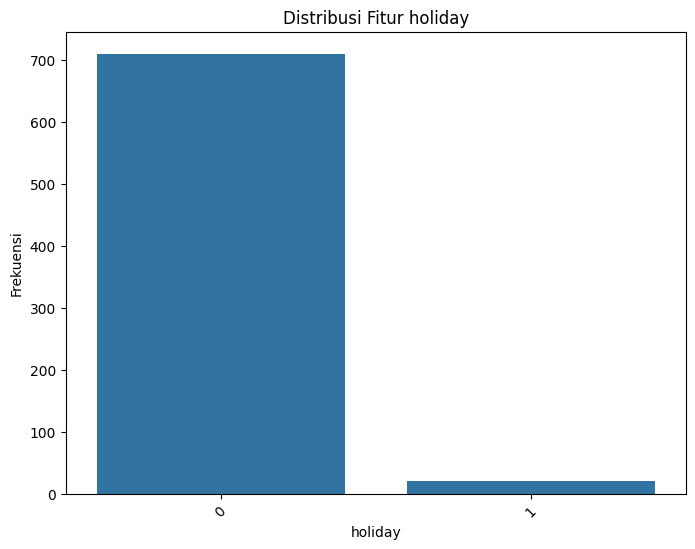

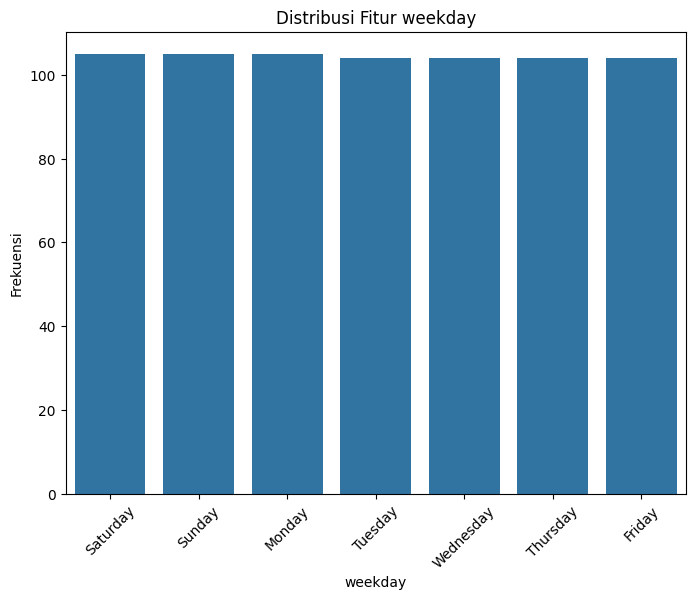

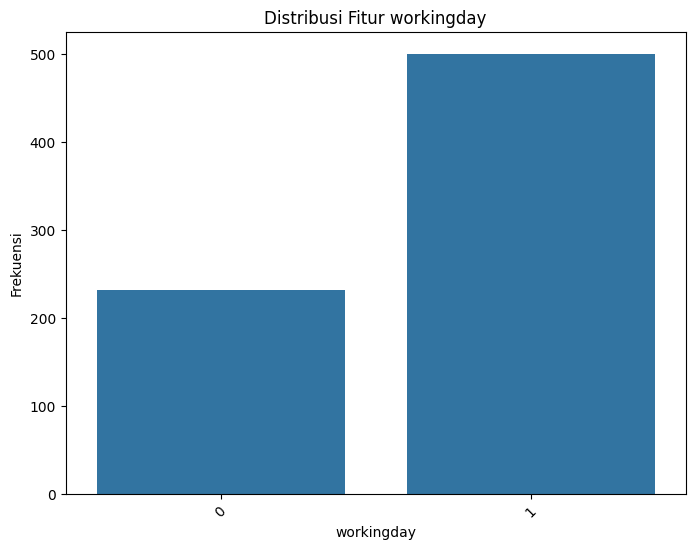

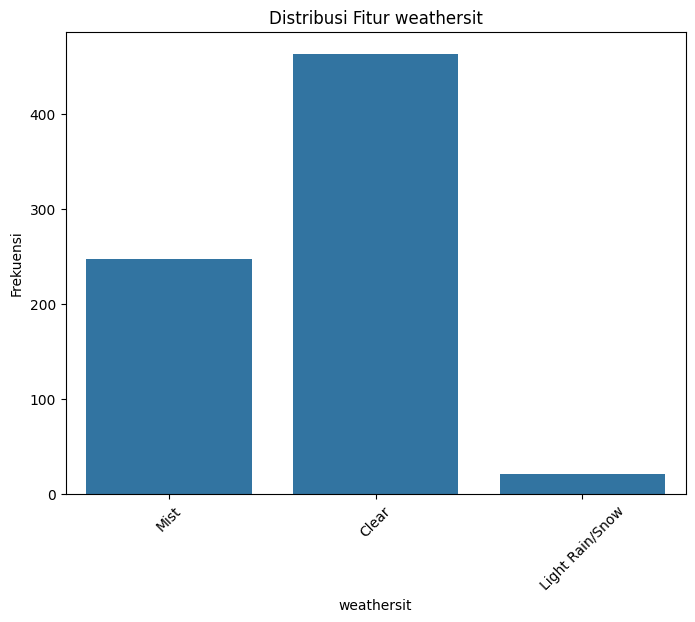

In [18]:
# Distribusi fitur numerik
numerical_features = df_day.select_dtypes(include=np.number).columns.tolist()
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.histplot(df_day[feature], kde=True)
  plt.title(f'Distribusi Fitur {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frekuensi')
  plt.show()

# Distribusi fitur kategorikal
categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for feature in categorical_features:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=feature, data=df_day)
  plt.title(f'Distribusi Fitur {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frekuensi')
  plt.xticks(rotation=45)
  plt.show()


### Bagaimana tren jumlah peminjaman sepeda perbulan dari tahun 2011-2012

In [19]:
# Menghitung jumlah peminjaman per bulan dari tahun 2011-2012
monthly_rentals = df_day.groupby(['yr', 'mnth'])[['casual', 'registered', 'cnt']].sum().sort_values(['yr', 'mnth'])

monthly_rentals

casual  registered     cnt
yr   mnth                            
2011 1       3073       35116   38189
     2       6242       41973   48215
     3      12826       51219   64045
     4      22346       72524   94870
     5      31050      104771  135821
     6      30612      112900  143512
     7      36452      104889  141341
     8      28842      107849  136691
     9      26545      100873  127418
     10     25222       98289  123511
     11     15594       86573  102167
     12      8448       78875   87323
2012 1       8969       87775   96744
     2       8721       94416  103137
     3      31618      133257  164875
     4      38456      135768  174224
     5      44235      151630  195865
     6      43294      159536  202830
     7      41705      161902  203607
     8      43197      171306  214503
     9      43778      174795  218573
     10     34538      164303  198841
     11     21009      131655  152664
     12     13245      110468  123713

In [20]:
# melihat jumlah peminjaman terbanyak sampai terendah pada tahun 2011

df_2011 = df_day[df_day['yr'] == 2011]

monthly_rentals_2011 = df_2011.groupby('mnth')['cnt'].sum().sort_values(ascending=False)

monthly_rentals_2011

,cnt
mnth,
6,143512
7,141341
8,136691
5,135821
9,127418
10,123511
11,102167
4,94870
12,87323


In [21]:
# Melihat jumlah peminjaman terbanyak sampai terendah pada tahun 2012

df_2012 = df_day[df_day['yr'] == 2012]

monthly_rentals_2012 = df_2012.groupby('mnth')['cnt'].sum().sort_values(ascending=False)

monthly_rentals_2012

,cnt
mnth,
9,218573
8,214503
7,203607
6,202830
10,198841
5,195865
4,174224
3,164875
11,152664


### Bagaimana pola peminjaman sepeda perminggu pada tahun 2011-2012

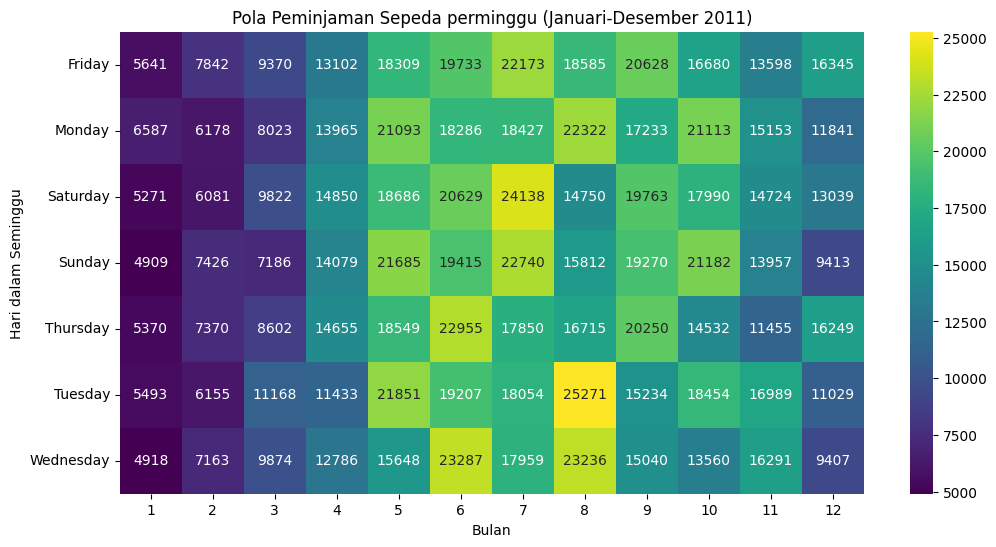

In [22]:
# Melihat pola peminjaman sepeda perminggu pada tahun 2011

df_2011 = df_day[df_day['yr'] == 2011]

weekly_rental_pattern = df_2011.groupby(['mnth', 'weekday'])['cnt'].sum().reset_index()

weekly_rental_pivot = weekly_rental_pattern.pivot(index='weekday', columns='mnth', values='cnt')

plt.figure(figsize=(12, 6))
sns.heatmap(weekly_rental_pivot, annot=True, fmt=".0f", cmap="viridis")
plt.title('Pola Peminjaman Sepeda perminggu (Januari-Desember 2011)')
plt.xlabel('Bulan')
plt.ylabel('Hari dalam Seminggu')
plt.show()

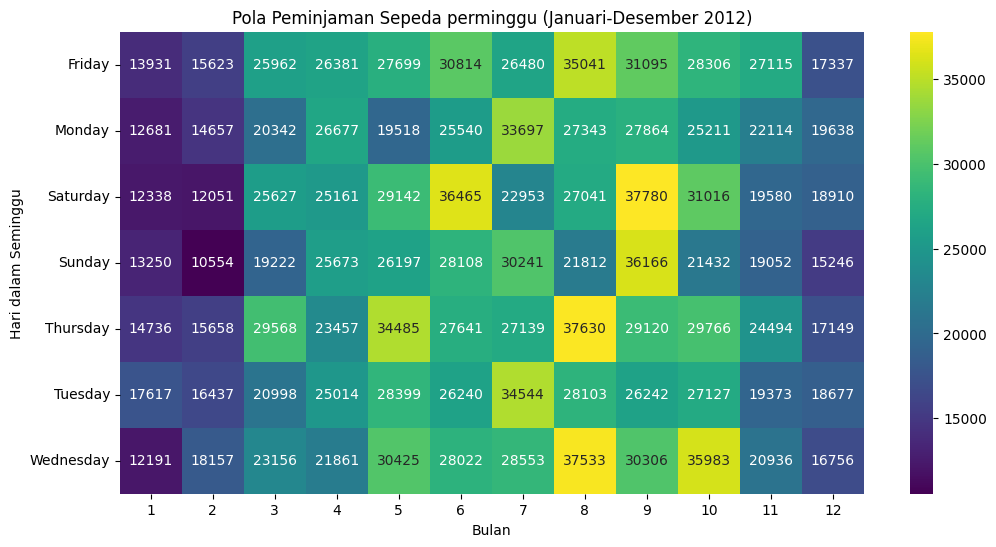

In [23]:
# Melihat pola peminjaman sepeda perminggu pada tahun 2012

df_2012 = df_day[df_day['yr'] == 2012]

weekly_rental_pattern_2012 = df_2012.groupby(['mnth', 'weekday'])['cnt'].sum().reset_index()

weekly_rental_pivot_2012 = weekly_rental_pattern_2012.pivot(index='weekday', columns='mnth', values='cnt')

plt.figure(figsize=(12, 6))
sns.heatmap(weekly_rental_pivot_2012, annot=True, fmt=".0f", cmap="viridis")
plt.title('Pola Peminjaman Sepeda perminggu (Januari-Desember 2012)')
plt.xlabel('Bulan')
plt.ylabel('Hari dalam Seminggu')
plt.show()


**Insight:**
- Melihat korelasi matrix pada data yag digunakan.
- Korelasi tinggi ada pada temp dan atemp memiliki korelasi hampir 1, registered dan casual memiliki korelasi cukup tinggi
- Korelasi negatif ada pada workingday dan casual dengan korelasi -0,52 menunjukan bahwa lebih sedikit peminjaman oleh casual pada hari kerja  dan winspeed dengan cnt meunjukan korelasi negatif
- Korelasi lemah ada pada holiday dan cnt yang mendekati nol diartikan dengan jumlah peminjaman tidak terlalu dipengaruhi oleh hari libur
- Data distibusi menggunakan metode sns.histplot untuk membuat histogram dan sns.countplot() untuk menghitung jumlah kemunculan kategori
- Mengkategorikan jumlah peminjaman terbanyak sampai terendah di setiap tahun
- Melihat pola peminjaman sepeda perminggu pada tahun 2011-2012

## Visualization & Explanatory Analysis

### Bagaimana tren jumlah peminjaman sepeda perbulan dari tahun 2011-2012

<ipython-input-24-c4328e1f039b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_rental_pattern, x='dteday', y='cnt', palette='viridis')


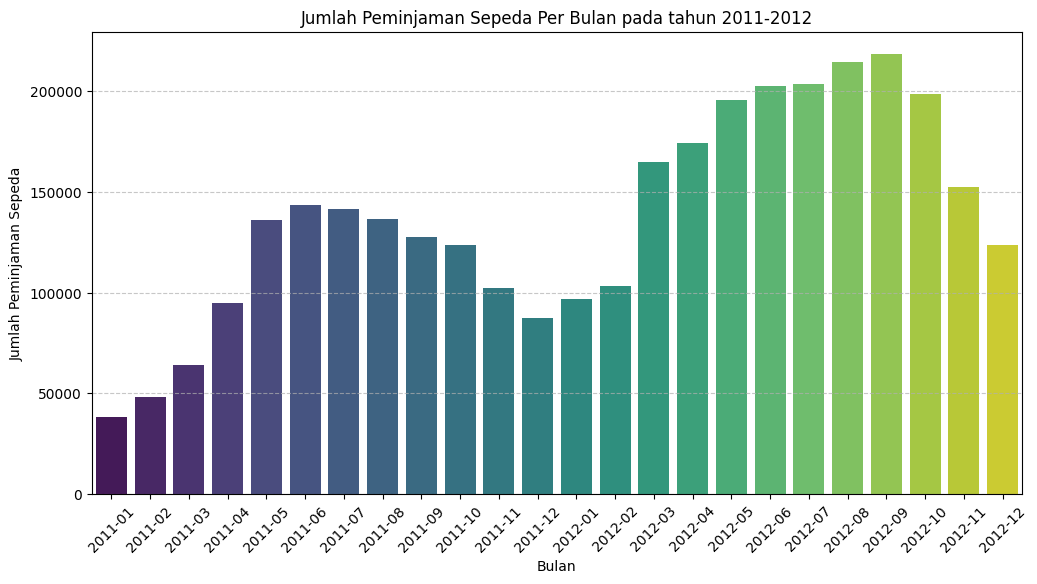

In [24]:
# Mengetahui jumlah peminjaman sepeda perbulan pada tahun 2011-2012
monthly_rental_pattern = df_day.groupby(df_day['dteday'].dt.to_period('M'))['cnt'].sum().reset_index()

monthly_rental_pattern['dteday'] = monthly_rental_pattern['dteday'].astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_rental_pattern, x='dteday', y='cnt', palette='viridis')
plt.title("Jumlah Peminjaman Sepeda Per Bulan pada tahun 2011-2012")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
# Mengetahui jumlah peminjaman sepeda perbulan tertinggi dan terendah pada tahun 2011 dan 2012
monthly_rentals = df_day.groupby(['yr', 'mnth'])['cnt'].sum()

highest_month_2011 = monthly_rentals[2011].idxmax()
lowest_month_2011 = monthly_rentals[2011].idxmin()

highest_month_2012 = monthly_rentals[2012].idxmax()
lowest_month_2012 = monthly_rentals[2012].idxmin()

print(f"Bulan dengan peminjaman tertinggi pada 2011: {highest_month_2011}")
print(f"Bulan dengan peminjaman terendah pada 2011: {lowest_month_2011}")
print(f"Bulan dengan peminjaman tertinggi pada 2012: {highest_month_2012}")
print(f"Bulan dengan peminjaman terendah pada 2012: {lowest_month_2012}")

Bulan dengan peminjaman tertinggi pada 2011: 6
Bulan dengan peminjaman terendah pada 2011: 1
Bulan dengan peminjaman tertinggi pada 2012: 9
Bulan dengan peminjaman terendah pada 2012: 1


### Bagaimana pola peminjaman sepeda perminggu pada tahun 2011-2012

<ipython-input-26-3fa81c087e97>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011['week'] = df_2011['dteday'].dt.isocalendar().week
<ipython-input-26-3fa81c087e97>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekly_rental_pattern, x='week', y='cnt', palette='viridis')


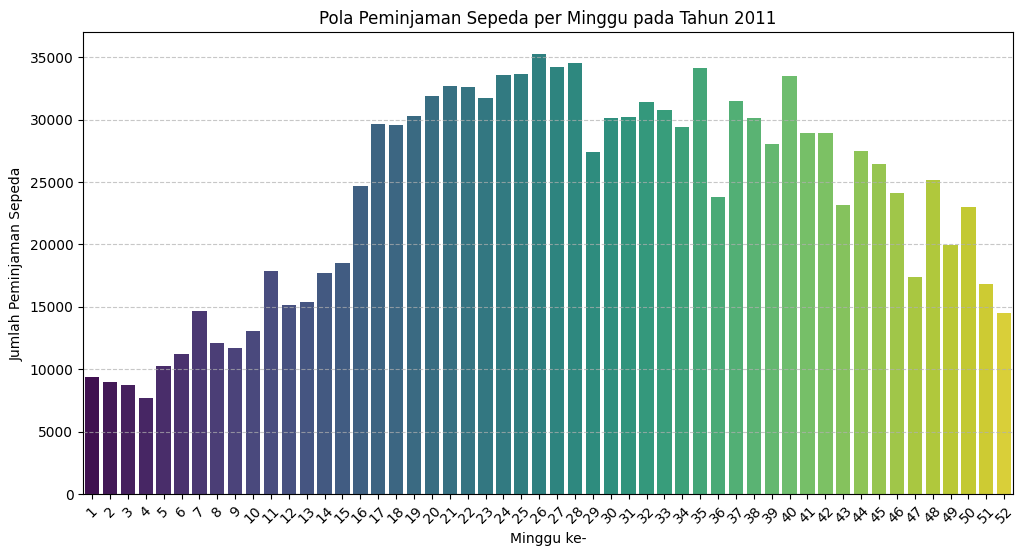

In [26]:
# Mengetahui pola peminjaman sepeda perminggu pada tahun 2011
df_2011 = df_day[df_day['yr'] == 2011]

df_2011['week'] = df_2011['dteday'].dt.isocalendar().week
weekly_rental_pattern = df_2011.groupby('week')['cnt'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=weekly_rental_pattern, x='week', y='cnt', palette='viridis')
plt.title("Pola Peminjaman Sepeda per Minggu pada Tahun 2011")
plt.xlabel("Minggu ke-")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-27-4281016ec2ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2012['week'] = df_2012['dteday'].dt.isocalendar().week
<ipython-input-27-4281016ec2ca>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekly_rental_pattern, x='week', y='cnt', palette='viridis')


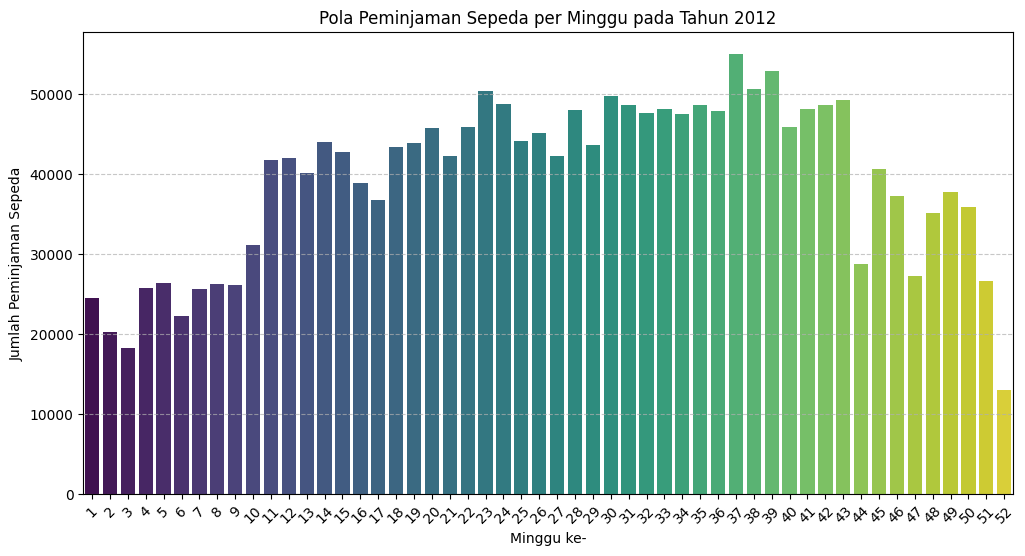

In [27]:
# Mengetahui pola peminjaman sepeda perminggu tahun 2012
df_2012 = df_day[df_day['yr'] == 2012]

df_2012['week'] = df_2012['dteday'].dt.isocalendar().week
weekly_rental_pattern = df_2012.groupby('week')['cnt'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=weekly_rental_pattern, x='week', y='cnt', palette='viridis')
plt.title("Pola Peminjaman Sepeda per Minggu pada Tahun 2012")
plt.xlabel("Minggu ke-")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [28]:
# Mengetahui jumlah peminjaman sepeda perminggu tertinggi dan terendah pada tahun 2011 dan 2012

df_2011_2012 = df_day[(df_day['yr'] == 2011) | (df_day['yr'] == 2012)]

df_2011_2012['week_number'] = df_2011_2012['dteday'].dt.isocalendar().week

weekly_rentals = df_2011_2012.groupby(['yr', 'week_number'])['cnt'].sum()

highest_week_2011 = weekly_rentals[2011].idxmax()
lowest_week_2011 = weekly_rentals[2011].idxmin()

highest_week_2012 = weekly_rentals[2012].idxmax()
lowest_week_2012 = weekly_rentals[2012].idxmin()

print(f"Minggu dengan peminjaman tertinggi pada 2011: {highest_week_2011}")
print(f"Minggu dengan peminjaman terendah pada 2011: {lowest_week_2011}")
print(f"Minggu dengan peminjaman tertinggi pada 2012: {highest_week_2012}")
print(f"Minggu dengan peminjaman terendah pada 2012: {lowest_week_2012}")


Minggu dengan peminjaman tertinggi pada 2011: 26
Minggu dengan peminjaman terendah pada 2011: 4
Minggu dengan peminjaman tertinggi pada 2012: 37
Minggu dengan peminjaman terendah pada 2012: 52


**Insight:**
- Visualisasi menggunakan diagram batang
- Hasil visualisasi pada tren jumlah peminjaman sepeda perbulan dari tahun 2011-2012  menunjukan bahwa peminjaman meningkat dengan signifikan setiap bulan namun ada penurunan pada akhir bulan di tahun 2011 dan 2012
- Bulan dengan peminjaman tertinggi pada tahun 2011 ada pada bulan juni
- Bulan dengan peminjaman tetringgi pada tahun 2012 ada pada bulan september
- Bulan dengan peminjaman terendah pada tahun 2011 dan 2012 ada pada bulan januari
- Pada visualisasi pola peminjaman sepeda perminggu pada tahun 2011 menunjukan bahwa kenaikan peminjaman ada pada minggu 16 sampai 28
- Pada visualisasi pola peminjaman sepeda perminggu pada tahun 2012 menunjukan bahwa peminjaman cenderung lebih stabil dari tahun 2011
- Minggu dengan peminjaman tertinggi tahun 2011 adalah minggu ke 26 dan terendah di minggu ke 4
- Minggu dengan peminjaman tertinggi tahun 2012 adalah pada minggu ke 37 dan terendah pada minggu ke 52


## Analisis Lanjutan (Opsional)

## Conclusion

## Bagaimana tren peminjaman sepeda perbulan dari tahun 2011-2012

- Jumlah peminjaman sepeda cenderung meningkat dari tahun 2011-2012.
- Bulan dengan peminjaman tertinggi memuncak pada bulan september 2012 sekitar lebih dari 212.000 peminjaman dan kemungkinan karena pengaruh cuaca yang ideal dan aktivitas di luar ruangan yang meningkat.
- Januari 2011 tercatat dengan angka peminjaman sepeda paling rendah, sekitar 6.000 yang kemungkinan besar akibat pengaruh cuaca musim dingin yang ekstrim.
- Pola musiman terlihat jelas dengan peningkatan di bulan bulan musim panas dan gugur periode juni-september dan mengalami penurunan saat musim dingin periode desember-februari.

### Rekomendasi
- Tingkatkan jumlah sepeda dan stasiun penyewaan saat bulan dengan peminjaman tinggi terutaman saat juni-september untuk mengantisipasi lonjakan permintaan
- Promosi layanan pada saat musim dingin seperti diskon atau sepeda dengan keamanan tambahan perlindungan untuk menarik pengguna saat penjualan rendah.
- Rencanakan pemeliharaan sepeda pada bulan januari atau desember karena memungkinkan downtime operasional.

## Bagaimana pola peminjaman sepeda perminggu pada tahun 2011-2012

- Perubahan mingguan menunjukan puncak peminjaman umumnya terjadi setiap akhir pekan, menandakan sepeda banyak digunakan untuk aktivitas rekreasi
- Minggu ke-36 tahun 2012 menjadi minggu dengan jumlah peminhaman tertinggi
- Minggu pertama januari 2011 adalah minggu dengan peminjaman terendah

### Rekomendasi
- Tambahkan layanan sepeda cadangan khusus akhir pekan untuk mengantisipasi terjadi nya lonjakan penggunaan.
- Tingkatkan promosi wisata bersepeda atau event mingguan saat musim ramai sekitar minggu ke 20 hingga 38
- Gunakan data mingguan untuk mengatur shift pekerja menyesuaikan lonjakan harian

Dari hasil 2 analisa di atas dapat disimpulkan bahwa peningkatan peminjaman kurang lebih di sebabkan oleh cuaca, peningkatan ada pada bulan dengan musim panas dan pada akhir pekan yang bisa dimanfaatkan dengan penambahan alat sepeda, membuat promosi pada bulan yang cenderung memiliki peminat yang lebih kecil dibanding bulan dan minggu lain yang lebih konsisten atau mengalami peningkatan, adanya biaya pemeliharaan sepeda untuk memastikan sepeda dapat beroperasi dengan baik.



In [29]:
df_day.to_csv("all_data.csv", index=False)